In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler


# Load the Dataset

In [2]:
df = pd.read_csv("dataset/diabetes.csv")
# df.head()
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


# Check for Missing Values

In [3]:
print(df.info())            # Check data types and nulls
print(df.describe())        # Statistical summary
print(df.isnull().sum())    # Count missing values per column


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB
None
                 age  hypertension  heart_disease            bmi  \
count  100000.000000  100000.00000  100000.000000  100000.000000   
mean       41.885856       0.07485       0.039420      27.320767   
std        22.516840       0.26315       0.194593       6.6

# drop dupes

In [4]:
df = df.drop_duplicates()
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,Female,36.0,0,0,No Info,24.60,4.8,145,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


# Encode the categorical Columns

In [5]:

# Label Encoding gender: male=1, female=0
df = pd.get_dummies(df, columns=['gender'], drop_first=True)

# Use one-hot encoding for multi-category column
df = pd.get_dummies(df, columns=['smoking_history'], drop_first=True)


# Scale Continuous Features

In [6]:
scaler = StandardScaler()
df[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']] = scaler.fit_transform(
    df[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']]
)


In [7]:
df

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,1.700840,0,1,-0.314947,0.994563,0.043554,0,False,False,False,False,False,True,False
1,0.543372,0,0,-0.000216,0.994563,-1.423096,0,False,False,False,False,False,False,False
2,-0.614096,0,0,-0.000216,0.155970,0.483549,0,True,False,False,False,False,True,False
3,-0.257952,0,0,-0.572051,-0.496269,0.410216,0,False,False,True,False,False,False,False
4,1.522768,1,1,-1.061141,-0.682623,0.410216,0,True,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,-0.257952,0,0,-0.402126,-0.682623,0.165775,0,False,False,False,False,False,False,False
99996,-1.771563,0,0,-1.470439,0.901386,-0.934213,0,False,False,False,False,False,False,False
99997,1.077588,0,0,0.075142,0.155970,0.410216,0,True,False,False,False,True,False,False
99998,-0.792168,0,0,1.196649,-1.428039,-0.934213,0,False,False,False,False,False,True,False


# Split Dataset into Train and Test Sets

In [8]:
from sklearn.model_selection import train_test_split

X = df.drop('diabetes', axis=1)
y = df['diabetes']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [9]:
y

0        0
1        0
2        0
3        0
4        0
        ..
99994    0
99996    0
99997    0
99998    0
99999    0
Name: diabetes, Length: 96146, dtype: int64

In [10]:
X

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,1.700840,0,1,-0.314947,0.994563,0.043554,False,False,False,False,False,True,False
1,0.543372,0,0,-0.000216,0.994563,-1.423096,False,False,False,False,False,False,False
2,-0.614096,0,0,-0.000216,0.155970,0.483549,True,False,False,False,False,True,False
3,-0.257952,0,0,-0.572051,-0.496269,0.410216,False,False,True,False,False,False,False
4,1.522768,1,1,-1.061141,-0.682623,0.410216,True,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,-0.257952,0,0,-0.402126,-0.682623,0.165775,False,False,False,False,False,False,False
99996,-1.771563,0,0,-1.470439,0.901386,-0.934213,False,False,False,False,False,False,False
99997,1.077588,0,0,0.075142,0.155970,0.410216,True,False,False,False,True,False,False
99998,-0.792168,0,0,1.196649,-1.428039,-0.934213,False,False,False,False,False,True,False


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96146 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          96146 non-null  float64
 1   hypertension                 96146 non-null  int64  
 2   heart_disease                96146 non-null  int64  
 3   bmi                          96146 non-null  float64
 4   HbA1c_level                  96146 non-null  float64
 5   blood_glucose_level          96146 non-null  float64
 6   diabetes                     96146 non-null  int64  
 7   gender_Male                  96146 non-null  bool   
 8   gender_Other                 96146 non-null  bool   
 9   smoking_history_current      96146 non-null  bool   
 10  smoking_history_ever         96146 non-null  bool   
 11  smoking_history_former       96146 non-null  bool   
 12  smoking_history_never        96146 non-null  bool   
 13  smoking_history_not c

# Train Model

In [12]:
for col in df.columns:
    print(f"Column: {col}")
    print(df[col].unique())
    print()

Column: age
[ 1.7008397   0.54337205 -0.61409561 -0.25795171  1.52276775 -0.9702395
  0.09819218  1.65632171  0.00915621 -0.43602366  0.49885406  1.61180372
  1.12210587 -1.19282943 -0.21343373 -0.07987977 -1.6380093   1.21114184
  1.3446958  -1.68252729 -0.52505963  0.14271017  0.05367419  0.3653001
 -0.03536178 -0.70313158 -0.34698769  1.38921379  1.56728574  1.07758788
 -0.56957762  0.81047996 -0.16891574 -1.72704527  0.676926    1.43373178
 -1.01475749  0.18722815 -0.92572151  0.76596198 -0.65861359 -1.28186541
  0.63240802 -1.77156326 -1.54897333 -1.37090138 -1.59349131  0.58789003
 -1.45993735  0.89951594  0.23174614 -1.32638339  1.16662386  1.47824976
 -0.88120353  0.72144399 -1.05927547 -0.79216755 -1.10379346 -0.74764957
 -1.8570378  -0.39150567 -1.14831145  0.85499795 -0.48054165 -1.50445534
  0.32078211 -0.12439775  1.0330699  -1.23734742  1.25565983 -1.83566916
  0.27626413  0.40981809  1.30017782 -1.82142341  0.98855191  0.94403392
  0.45433607 -1.85347636 -1.41541937 -0.3

In [13]:
!pip install xgboost
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

# # Evaluation Function
def evaluate_model(name, y_true, y_pred):
    print(f"\n=== {name} ===")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))

# # Evaluate all models
evaluate_model("XGBoost", y_test, y_pred_xgb)



=== XGBoost ===
Accuracy: 0.9697867914716589
Precision: 0.956
Recall: 0.694363742010459
F1 Score: 0.8044429485021878
Confusion Matrix:
 [[17454    55]
 [  526  1195]]


/home/yeshey/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [09:50:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [14]:
import pickle
filename = 'model/diabetes_disease_model.sav'
pickle.dump(xgb, open(filename, 'wb'))

<Figure size 1000x600 with 0 Axes>

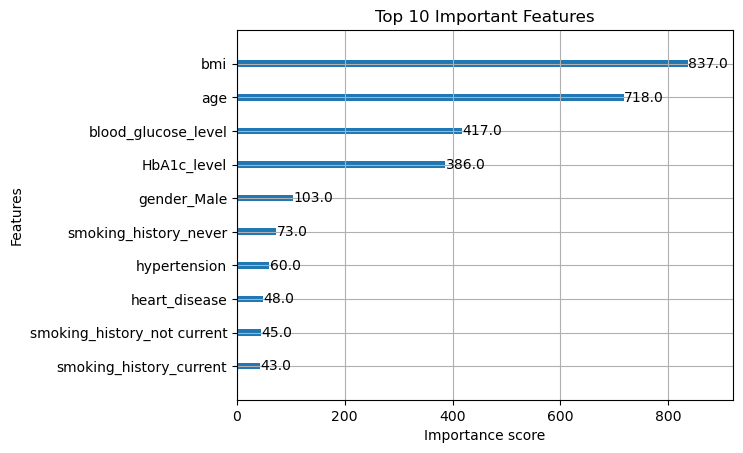

In [15]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

# # Load the model from the pickle file
# with open('xgb_diabetes_model.pkl', 'rb') as f:
#     xgb_loaded = pickle.load(f)

# # Use the loaded model for predictions
# y_pred = xgb_loaded.predict(X_test)

# Plot feature importance
plt.figure(figsize=(10, 6))
plot_importance(xgb, max_num_features=10)
plt.title("Top 10 Important Features")
plt.show()


In [16]:
df.to_csv('data_preprocessed/diabetes.csv',index=False)

In [17]:
df.shape

(96146, 14)